<a href="https://colab.research.google.com/github/dayananikol/CCADMACL_PROJECT_COM222/blob/main/ADML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn
import kagglehub
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
import umap


In [ ]:
# Download the dataset
path = kagglehub.dataset_download("mexwell/drug-consumption-classification")
print("Path to dataset files:", path)

# Inspect the downloaded directory
print("Files in the directory:")
print(os.listdir(path))

# Update the path to point to the correct location of the data.
#Get the file name:
file_name = os.listdir(path)[0]
data_path = os.path.join(path, file_name)

#display all columns
pd.set_option('display.max_columns', None)
# Make the dataframe:
df = pd.read_csv(data_path, sep=",")  # Read in the data from the correct path.


print("First 5 records:")
print(df.head())

100%|██████████| 56.3k/56.3k [00:00<00:00, 13.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mexwell/drug-consumption-classification/versions/1
Files in the directory:
['drug_consumption.csv']
First 5 records:
   ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore   Cscore  Impulsive       SS Alcohol Amphet Amyl Benzos  \
0 -0.58331 -0.91699 -0.00665   -0.21712 -1.18084     CL5    CL2  CL0    CL2   
1  1.43533  0.76096 -0.14277   -0.71126 -0.21575     CL5    CL2  CL2    CL0   
2 -0.84732 -1.62090 -1.01450   -1.37983  0.40148     CL6    CL0  CL0    CL0   
3 -0.01928  0.59042  0.58489   -1.3

In [ ]:
is_duplicate = df.duplicated()
print(is_duplicate)
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

0       False
1       False
2       False
3       False
4       False
        ...  
1880    False
1881    False
1882    False
1883    False
1884    False
Length: 1885, dtype: bool
Number of duplicate rows: 0


In [ ]:
df.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

## Data Preprocessing

In [ ]:
df.drop(columns='ID', inplace=True)
df.head(2)

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


In [ ]:
# Filter out rows with 'CL1', 'CL2', 'CL3', or 'CL4' in 'Semer'
df = df[~df['Semer'].isin(['CL1', 'CL2', 'CL3', 'CL4'])]
df = df.reset_index(drop=True)  # Reset the index (optional)

In [ ]:
# 1. Identify target columns.
drug_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
             'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']

# 2. Create a mapping dictionary.
cl_mapping = {'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6}

# 3. Apply the mapping to the drug columns.
for col in drug_cols:
    df[col] = df[col].map(cl_mapping)

##Feature Engineering

In [ ]:
# Define lists of drugs
common_substances = ['Alcohol', 'Amyl', 'Caff', 'Cannabis', 'Choc', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']
hard_drugs = ['Amphet', 'Benzos',  'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD']

# For each individual, count the number of common substances used frequently (usage >= 4)
df['common_high'] = df[common_substances].apply(lambda row: sum(row >= 4), axis=1)

# Count the number of hard drugs used at least occasionally (usage >= 3)
df['hard_occ'] = df[hard_drugs].apply(lambda row: sum(row >= 3), axis=1)

# Create a composite risk score by summing the two counts
df['composite_risk'] = df['common_high'] + df['hard_occ']

# Define a threshold (e.g., 3 or more) to classify as high drug use
threshold = 8
df['high_drug_use'] = df['composite_risk'] >= threshold

In [ ]:
df['high_drug_use'] = df['high_drug_use'].map({False: 0, True: 1})

In [ ]:
df['high_drug_use'].value_counts()

,count
high_drug_use,
0,1397
1,480


##Data Exploration

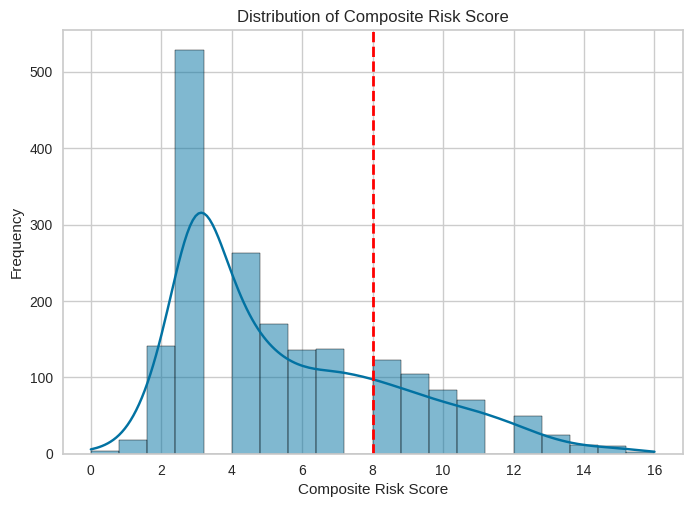

In [ ]:
sns.histplot(df['composite_risk'], bins=20, kde=True)
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Composite Risk Score')
plt.ylabel('Frequency')
plt.title('Distribution of Composite Risk Score')
plt.show()

In [ ]:
# 4. Make sure that the remaining columns are numerical
# Check which ones are not numerical
non_numerical = df.select_dtypes(exclude=['number']).columns
print('Non-numerical columns:', non_numerical)

# Convert non-numerical columns to numeric
df[non_numerical] = df[non_numerical].apply(pd.to_numeric)

Non-numerical columns: Index([], dtype='object')


In [ ]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,common_high,hard_occ,composite_risk,high_drug_use
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,3,0,3,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,7,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,3,1,4,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,0


##Principal Component Analysis (PCA) for Dimensionality Reduction

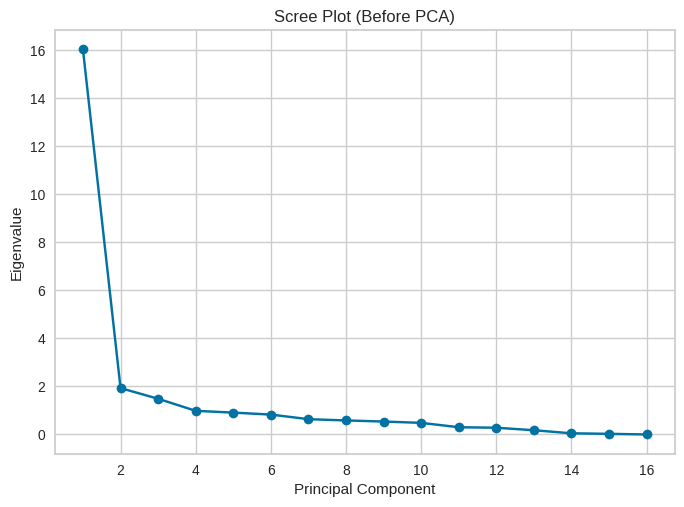

Cumulative Variance Explained: [0.63491937 0.71137952 0.77027021 0.80925305 0.84530658 0.87812112
 0.90334809 0.92647987 0.94780171 0.96695704 0.97889949 0.99002019
 0.99702556 0.99894106 1.         1.        ]


In [ ]:
# 5. Calculate the covariance matrix
cov_matrix = np.cov(df, rowvar=False)

# 6. Calculate the eigenvalues
eigenvalues = np.linalg.eigvals(cov_matrix)

# 7. Sort the eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# 8. Create the scree plot
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o')
plt.title('Scree Plot (Before PCA)')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# 9. Calculate and print the explained variance ratio
total_variance = sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Variance Explained:", cumulative_variance)

In [ ]:
# 10. the number of components based on the scree plot
n_components = 3

pca = PCA(n_components=n_components)
# Fit the PCA model and transform the data in separate steps
PCA_features = df[['Age',	'Gender',	'Education',	'Country',	'Ethnicity',	'Nscore',	'Escore',	'Oscore',	'Ascore',	'Cscore',	'Impulsive',	'SS']]
pca.fit(PCA_features)  # Fit PCA on the selected features
PCA_transformed_data = pca.transform(PCA_features) # Transform the data

# Create the DataFrame using the transformed data
PCA_ds = pd.DataFrame(PCA_transformed_data, columns=[f"col{i+1}" for i in range(n_components)])
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1877.0,1.514209e-17,1.565775,-4.223640,-1.163368,-0.017650,1.139763,4.632164
col2,1877.0,7.571047e-18,1.352260,-4.531196,-0.887293,-0.015105,0.884885,4.454608
col3,1877.0,-4.542628e-17,0.958900,-4.035867,-0.659477,-0.009741,0.648501,4.087801


In [ ]:
explained_variance = pca.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("cumulative variance", cumulative_variance)

Explained variance of PC1 0.2655693795105467
Explained variance of PC2 0.19807973127544817
Explained variance of PC3 0.09960160548224782
cumulative variance [0.26556938 0.46364911 0.56325072]


##Clustering Analysis

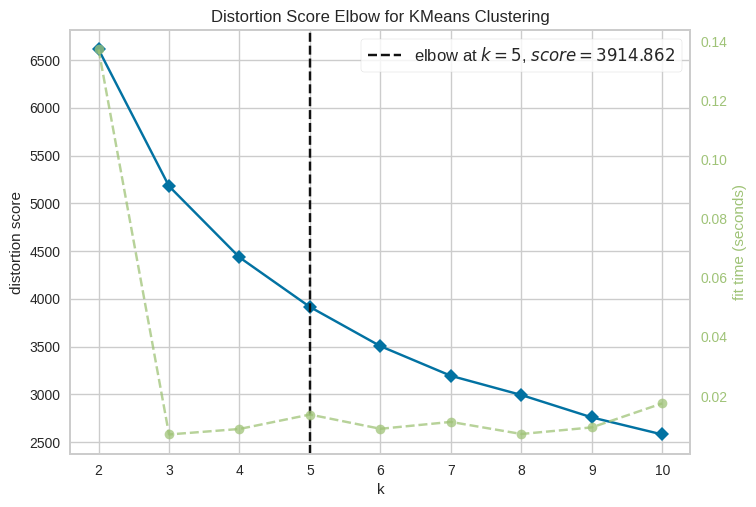

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
# Clustering with KMeans
PCA_kmeans = PCA_ds.copy()
kmeans = KMeans(n_clusters=3, random_state=40, n_init='auto')
PCA_kmeans['KMeans_Cluster'] = kmeans.fit_predict(PCA_kmeans)

# Evaluate KMeans
silhouette_avg_kmeans = silhouette_score(PCA_kmeans.drop('KMeans_Cluster', axis=1), PCA_kmeans['KMeans_Cluster'])
print(f"The average silhouette_score of KMeans is : {silhouette_avg_kmeans}")
db_index_kmeans = davies_bouldin_score(PCA_kmeans.drop('KMeans_Cluster', axis=1), PCA_kmeans['KMeans_Cluster'])
print(f"The Davies-Bouldin Index of KMeans is: {db_index_kmeans}")
ch_index_kmeans = calinski_harabasz_score(PCA_kmeans.drop('KMeans_Cluster', axis=1), PCA_kmeans['KMeans_Cluster'])
print(f"The Calinski-Harabasz Index of KMeans is: {ch_index_kmeans}")
print()


# Clustering with Agglomerative
PCA_agg = PCA_ds.copy()
agg_clustering = AgglomerativeClustering(n_clusters=3)
PCA_agg['Agglomerative_Cluster'] = agg_clustering.fit_predict(PCA_agg)

# Evaluate Agglomerative
silhouette_avg_agg = silhouette_score(PCA_agg.drop('Agglomerative_Cluster', axis=1), PCA_agg['Agglomerative_Cluster'])
print(f"The average silhouette_score of Agglomerative is : {silhouette_avg_agg}")
db_index_agg = davies_bouldin_score(PCA_agg.drop('Agglomerative_Cluster', axis=1), PCA_agg['Agglomerative_Cluster'])
print(f"The Davies-Bouldin Index of Agglomerative is: {db_index_agg}")
ch_index_agg = calinski_harabasz_score(PCA_agg.drop('Agglomerative_Cluster', axis=1), PCA_agg['Agglomerative_Cluster'])
print(f"The Calinski-Harabasz Index of Agglomerative is: {ch_index_agg}")
print()


# Clustering with DBSCAN
PCA_dbscan = PCA_ds.copy()
dbscan = DBSCAN(eps=0.5, min_samples=4) # Adjust parameters as needed.
PCA_dbscan['DBSCAN_Cluster'] = dbscan.fit_predict(PCA_dbscan)

# Filter out -1 labels
mask = PCA_dbscan['DBSCAN_Cluster'] != -1
filtered_pca_dbscan = PCA_dbscan[mask]

# Evaluate DBSCAN only if there are at least 2 clusters
unique_labels = filtered_pca_dbscan['DBSCAN_Cluster'].nunique()

if unique_labels >= 2:
    silhouette_avg_dbscan = silhouette_score(filtered_pca_dbscan.drop('DBSCAN_Cluster', axis=1), filtered_pca_dbscan['DBSCAN_Cluster'])
    print(f"The average silhouette_score of DBSCAN is : {silhouette_avg_dbscan}")
    db_index_dbscan = davies_bouldin_score(filtered_pca_dbscan.drop('DBSCAN_Cluster', axis=1), filtered_pca_dbscan['DBSCAN_Cluster'])
    print(f"The Davies-Bouldin Index of DBSCAN is: {db_index_dbscan}")
    ch_index_dbscan = calinski_harabasz_score(filtered_pca_dbscan.drop('DBSCAN_Cluster', axis=1), filtered_pca_dbscan['DBSCAN_Cluster'])
    print(f"The Calinski-Harabasz Index of DBSCAN is: {ch_index_dbscan}")
else:
    print(f"DBSCAN was unable to find more than one cluster using the provided parameters. Found {unique_labels} clusters.")


The average silhouette_score of KMeans is : 0.2726756981257605
The Davies-Bouldin Index of KMeans is: 1.2176883316386151
The Calinski-Harabasz Index of KMeans is: 827.8921228671456

The average silhouette_score of Agglomerative is : 0.2279530698357122
The Davies-Bouldin Index of Agglomerative is: 1.3770246719715555
The Calinski-Harabasz Index of Agglomerative is: 640.2169895713704

The average silhouette_score of DBSCAN is : -0.16521337797066338
The Davies-Bouldin Index of DBSCAN is: 0.7008475691143604
The Calinski-Harabasz Index of DBSCAN is: 12.607513644514913


##Clustering Evaluation

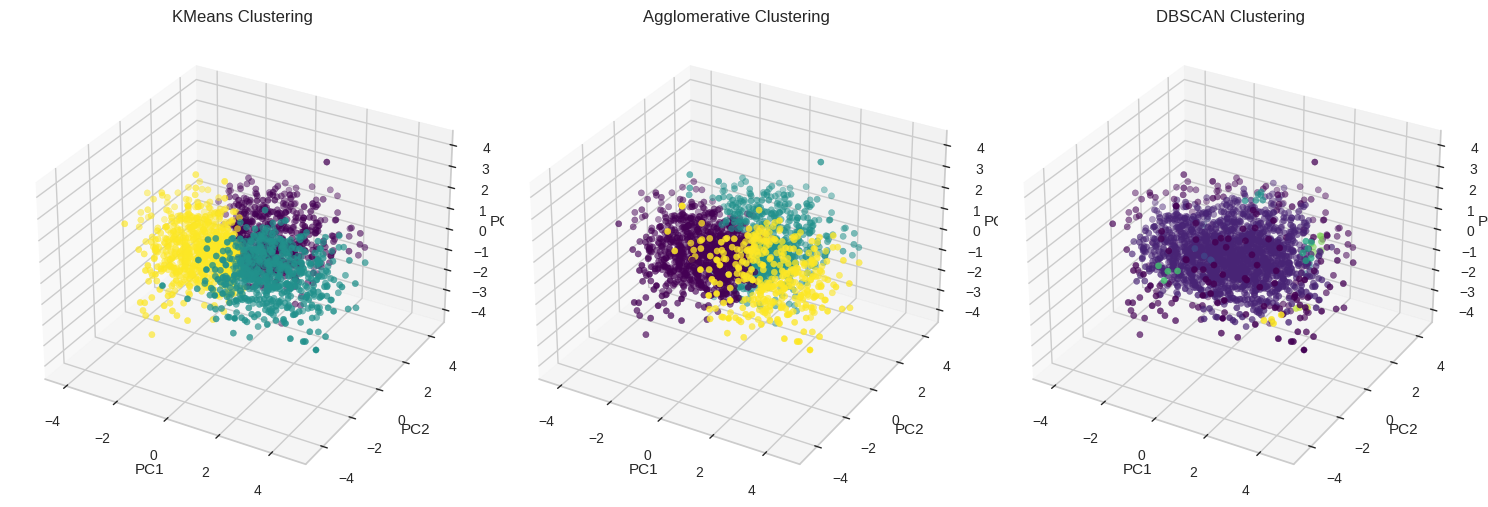

DBSCAN Silhouette Score: -0.16521337797066338
KMeans Silhouette Score: 0.2726756981257605
Agglomerative Clustering Silhouette Score: 0.2279530698357122


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
import numpy as np

# Create figure for 3D scatter plots
fig = plt.figure(figsize=(15, 5))

# KMeans plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(PCA_kmeans['col1'], PCA_kmeans['col2'], PCA_kmeans['col3'], c=PCA_kmeans['KMeans_Cluster'], cmap='viridis')
ax1.set_title('KMeans Clustering')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')

# Agglomerative Clustering plot
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(PCA_agg['col1'], PCA_agg['col2'], PCA_agg['col3'], c=PCA_agg['Agglomerative_Cluster'], cmap='viridis')
ax2.set_title('Agglomerative Clustering')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')

# DBSCAN plot
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(PCA_dbscan['col1'], PCA_dbscan['col2'], PCA_dbscan['col3'], c=PCA_dbscan['DBSCAN_Cluster'], cmap='viridis')
ax3.set_title('DBSCAN Clustering')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(PCA_kmeans[['col1', 'col2', 'col3']], PCA_kmeans['KMeans_Cluster'])
hac_silhouette = silhouette_score(PCA_agg[['col1', 'col2', 'col3']], PCA_agg['Agglomerative_Cluster'])

# DBSCAN silhouette score (exclude noise points)
unique_dbscan_labels = PCA_dbscan['DBSCAN_Cluster'].nunique()
if unique_dbscan_labels > 1:
    dbscan_silhouette = silhouette_score(filtered_pca_dbscan[['col1', 'col2', 'col3']], filtered_pca_dbscan['DBSCAN_Cluster'])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
else:
    print("DBSCAN Silhouette Score: Not applicable (only one cluster or all noise)")

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {hac_silhouette}")


In [ ]:
df['KMeans_Cluster'] = PCA_kmeans['KMeans_Cluster']
print(df.head())

       Age   Gender  Education  Country  Ethnicity   Nscore   Escore   Oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    Ascore   Cscore  Impulsive       SS  common_high  hard_occ  \
0 -0.91699 -0.00665   -0.21712 -1.18084            3         0   
1  0.76096 -0.14277   -0.71126 -0.21575            5         2   
2 -1.62090 -1.01450   -1.37983  0.40148            3         0   
3  0.59042  0.58489   -1.37983 -1.18084            3         1   
4 -0.30172  1.30612   -0.21712 -0.21575            3         0   

   composite_risk  high_drug_use  KMeans_Cluster  
0               3              0               2  
1             

In [ ]:
print(df['KMeans_Cluster'].value_counts())

KMeans_Cluster
2    762
1    572
0    543
Name: count, dtype: int64


<ipython-input-25-be6fd1040e0f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl2 = sns.countplot(x=df['KMeans_Cluster'], palette= pal)
<ipython-input-25-be6fd1040e0f>:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  pl2 = sns.countplot(x=df['KMeans_Cluster'], palette= pal)


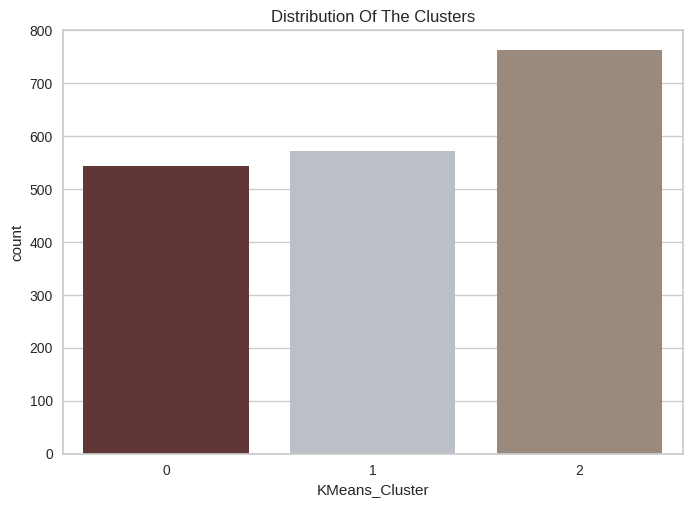

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl2 = sns.countplot(x=df['KMeans_Cluster'], palette= pal)
pl2.set_title("Distribution Of The Clusters")
plt.show()

In [ ]:
# Calculate the proportion (mean) of high_drug_use for each cluster
cluster_high_drug_use = df.groupby('KMeans_Cluster')['high_drug_use'].mean()
print(cluster_high_drug_use)

KMeans_Cluster
0    0.408840
1    0.398601
2    0.039370
Name: high_drug_use, dtype: float64


KMeans_Cluster
- 2    762 (2% high risk users = 15)
- 1    572 (30% high risk users = 163)
- 0    543 (30% high risk users = 163)

In [ ]:
# See detailed counts per cluster
cluster_drug_use_counts = df.groupby('KMeans_Cluster')['high_drug_use'].value_counts(normalize=True)
print(cluster_drug_use_counts)

KMeans_Cluster  high_drug_use
0               0                0.591160
                1                0.408840
1               0                0.601399
                1                0.398601
2               0                0.960630
                1                0.039370
Name: proportion, dtype: float64


In [ ]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,common_high,hard_occ,composite_risk,high_drug_use,KMeans_Cluster
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,3,0,3,0,2
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,7,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3,0,3,0,2
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,3,1,4,0,2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3,0,3,0,2


#Profiling found clusters with KMeans Algorithm        

<ipython-input-71-d04cfc9995ab>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




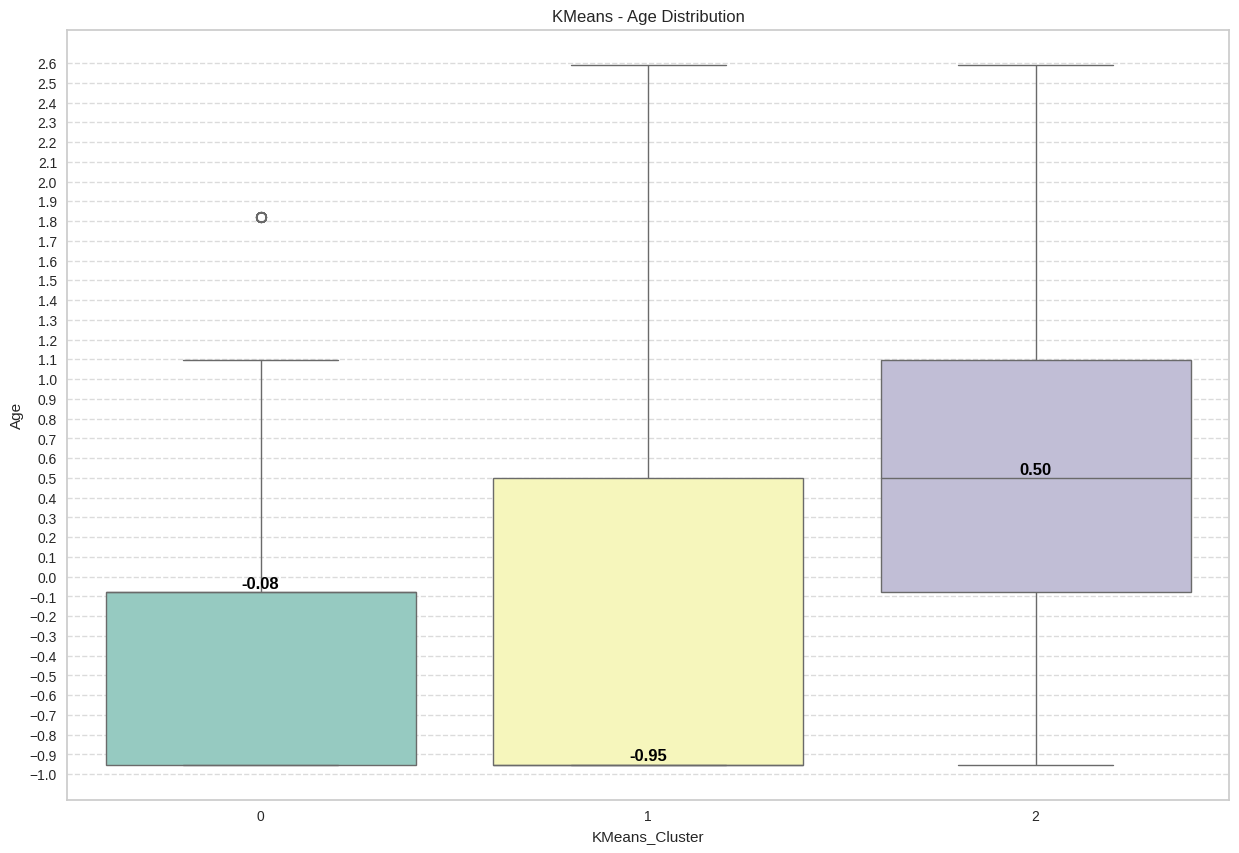

In [ ]:
feature1 = 'Age'

plt.figure(figsize=(15, 10))
# plt.subplot(1, 2, 2)  # Remove if using the entire figure
sns.boxplot(x='KMeans_Cluster', y=feature1, data=df, palette="Set3")
plt.title(f"KMeans - {feature1} Distribution")

# Calculate and add median values
medians = df.groupby('KMeans_Cluster')[feature1].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Get min and max for Age to dynamically set y-axis ticks
age_min = df[feature1].min()
age_max = df[feature1].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(age_min, 1), round(age_max + 0.1, 1), 0.1))

# Add a horizontal grid (optional)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

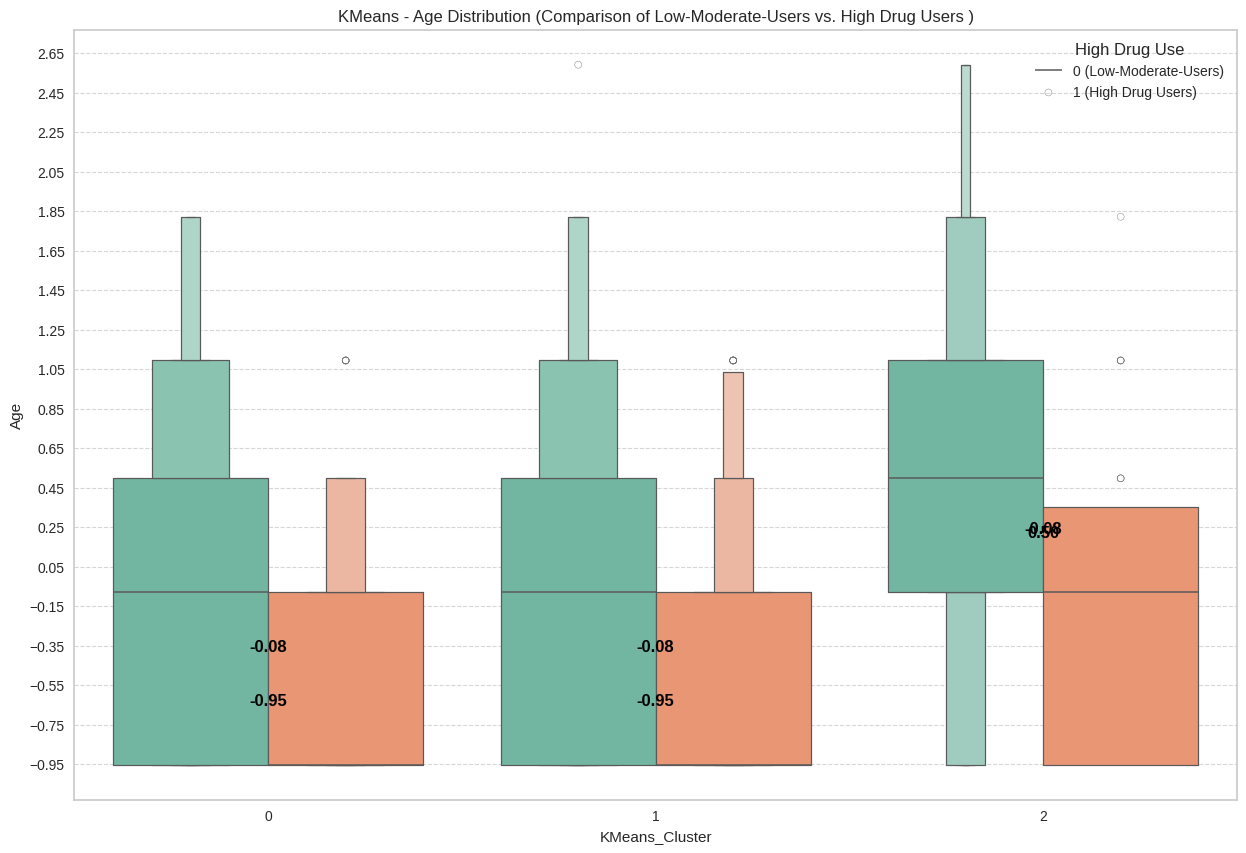

In [ ]:
# Define the feature to visualize
feature1 = 'Age'

# Create the boxen plot
plt.figure(figsize=(15, 10))
sns.boxenplot(x='KMeans_Cluster', y=feature1, hue='high_drug_use', data=df, palette="Set2")
plt.title(f"KMeans - {feature1} Distribution (Comparison of Low-Moderate-Users vs. High Drug Users )")

# Calculate and add median values for each cluster and each group (0 and 1)
medians = df.groupby(['KMeans_Cluster', 'high_drug_use'])[feature1].median().reset_index()

for index, row in medians.iterrows():
    cluster_position = row['KMeans_Cluster']  # Cluster position on x-axis
    user_group = row['high_drug_use']  # 0 (Low-Moderate-Users) or 1 (High Drug Users)
    median_value = row[feature1]

    # Adjust text position for better visibility
    text_offset = 0.3 if user_group == 1 else -0.3

    plt.text(cluster_position, median_value + text_offset, f'{median_value:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Dynamically set y-axis range based on actual values (to two decimal places)
age_min = df[feature1].min()
age_max = df[feature1].max()

# Generate y-ticks with a step size of 0.2 for better accuracy
plt.yticks(np.arange(round(age_min, 2), round(age_max + 0.2, 2), 0.2))

# Add a horizontal grid (fine-tuned for readability)
plt.grid(axis='y', linestyle='--', alpha=0.8, linewidth=0.8)  # More visible grid lines

# Show legend
plt.legend(title="High Drug Use", labels=["0 (Low-Moderate-Users)", "1 (High Drug Users)"])

plt.show()


Across all clusters, the general trend is:
- High Drug users: consistently ranges mostly from ages 18 - 34 (younger individuals)
- Low - Moderate Drug users: ranges mostly 34 - 54 (Older folks)

Trend points:
- -0.95197 	(18yrs - 24yrs old)
- -0.07854 	(25yrs - 34yrs old)
- 1.09449 	(45yrs - 54yrs old)

<ipython-input-70-44ef36b75f0a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




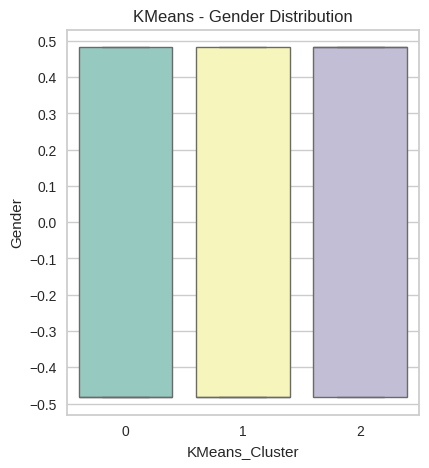

In [ ]:
feature2 = 'Gender'

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature2, data=df, palette="Set3")
plt.title(f"KMeans - {feature2} Distribution")

# Get min and max for Age to dynamically set y-axis ticks
gender_min = df[feature2].min()
gender_max = df[feature2].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(gender_min, 1), round(gender_max + 0.1, 1), 0.1))

plt.show()

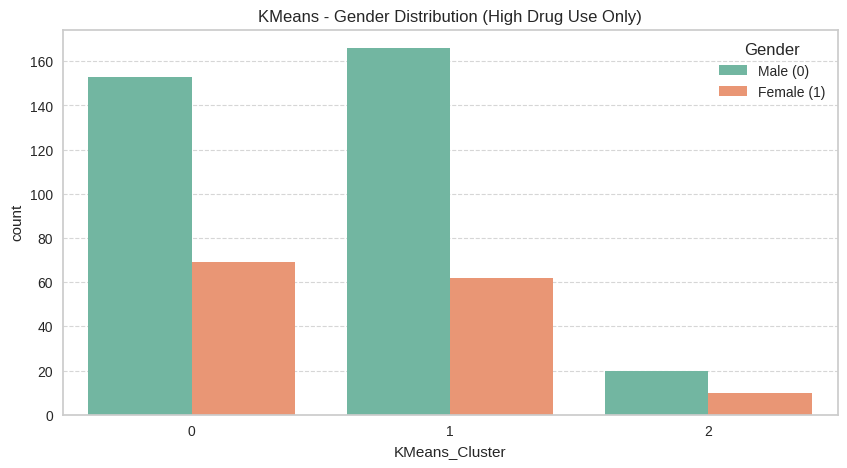

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='KMeans_Cluster', hue='Gender', data=df[df['high_drug_use'] == 1], palette="Set2")
plt.title(f"KMeans - Gender Distribution (High Drug Use Only)")

# Add legend
plt.legend(title="Gender", labels=["Male (0)", "Female (1)"])

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.8, linewidth=0.8)

plt.show()

Across all clusters, the general trend is:
- High Drug users: Mostly males
- Low - Moderate Drug users: Mostly females

<ipython-input-69-e6c59c111dc2>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




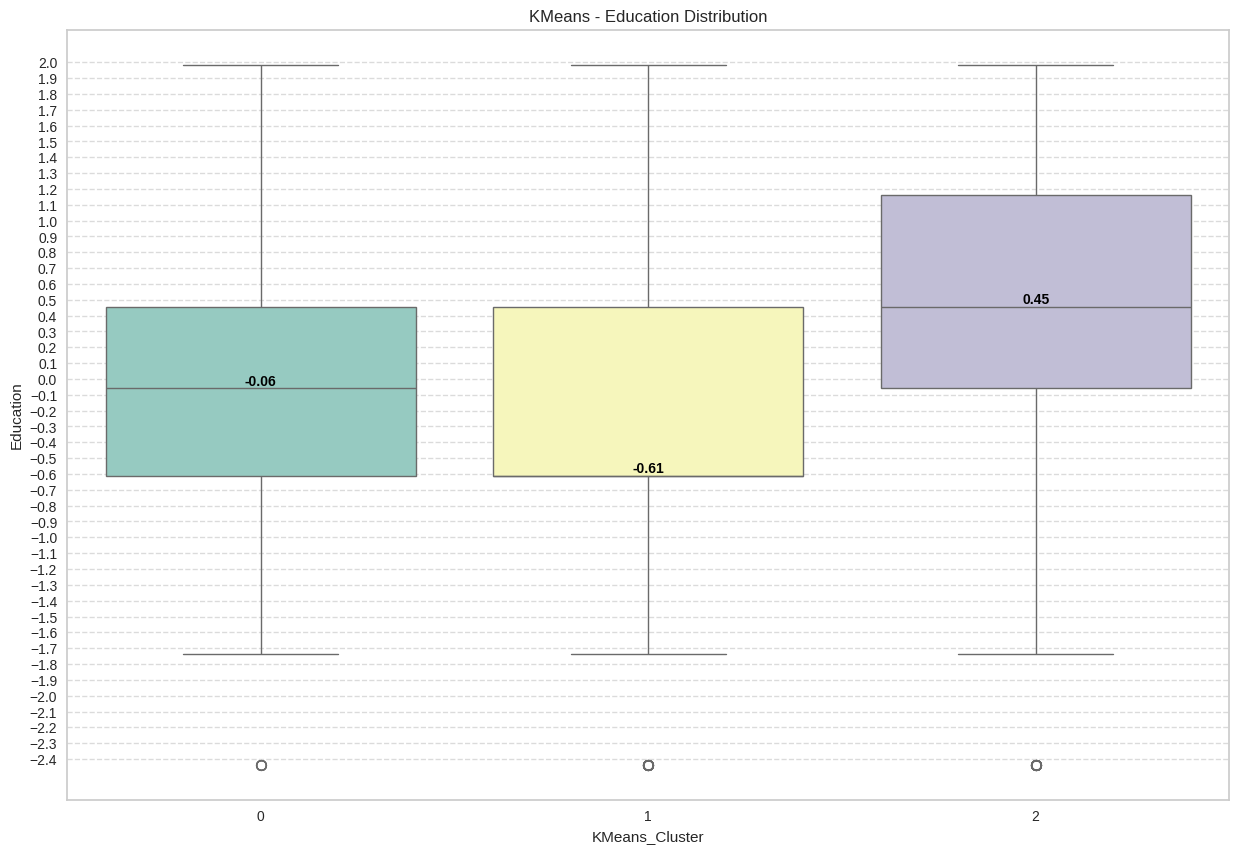

In [ ]:
feature3 = 'Education'

plt.figure(figsize=(15, 10))
# plt.subplot(1, 2, 2)  # Remove if using the entire figure
sns.boxplot(x='KMeans_Cluster', y=feature3, data=df, palette="Set3")
plt.title(f"KMeans - {feature3} Distribution")

# Calculate and add median values (optional)
medians = df.groupby('KMeans_Cluster')[feature3].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='semibold')

# Get min and max for dynamic y-axis ticks
education_min = df[feature3].min()
education_max = df[feature3].max()

# Generate y-ticks with desired step size
plt.yticks(np.arange(round(education_min, 1), round(education_max + 0.1, 1), 0.1))

# Add a horizontal grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

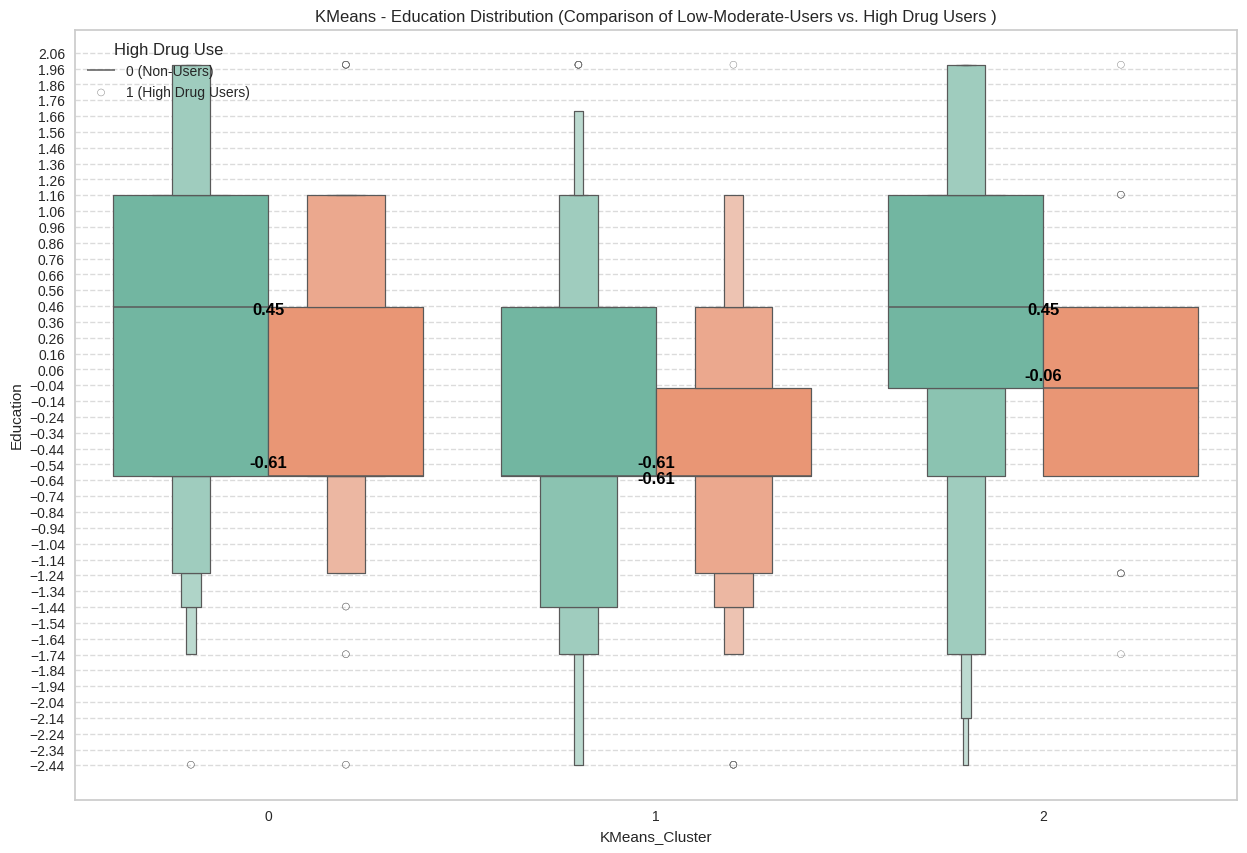

In [ ]:
feature3 = 'Education'

# Create the boxen plot
plt.figure(figsize=(15, 10))
sns.boxenplot(x='KMeans_Cluster', y=feature3, hue='high_drug_use', data=df, palette="Set2")
plt.title(f"KMeans - {feature3} Distribution (Comparison of Low-Moderate-Users vs. High Drug Users )")

# Calculate and add median values for each cluster and each group (0 and 1)
medians = df.groupby(['KMeans_Cluster', 'high_drug_use'])[feature3].median().reset_index()

for index, row in medians.iterrows():
    cluster_position = row['KMeans_Cluster']  # Cluster position on x-axis
    user_group = row['high_drug_use']  # 0 (Non-Users) or 1 (High Drug Users)
    median_value = row[feature3]

    # Adjust text position for better visibility
    text_offset = 0.05 if user_group == 1 else -0.05

    plt.text(cluster_position, median_value + text_offset, f'{median_value:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Dynamically set y-axis range based on actual values (to two decimal places)
education_min = df[feature3].min()
education_max = df[feature3].max()

# Generate y-ticks with a step size of 0.1 for better granularity
plt.yticks(np.arange(round(education_min, 2), round(education_max + 0.1, 2), 0.1))

# Add a horizontal grid (fine-tuned for readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show legend
plt.legend(title="High Drug Use", labels=["0 (Non-Users)", "1 (High Drug Users)"])

plt.show()


Across all clusters, the general trend is:
- High Drug users: Mostly those with **lower education** attained comparatively
- Low - Moderate Drug users: Mostly those who have attained **higher education**


Trend points:
-  0.45468 	University Degree
- -0.61113 	Some College, No Certificate Or Degree
- -1.22751 	Left School at 18 years


<ipython-input-68-d97bc90bcdab>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




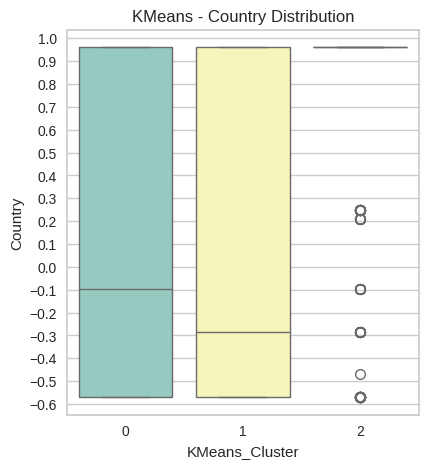

In [ ]:
feature4 = 'Country'

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature4, data=df, palette="Set3")
plt.title(f"KMeans - {feature4} Distribution")

# Get min and max for Age to dynamically set y-axis ticks
country_min = df[feature4].min()
country_max = df[feature4].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(country_min, 1), round(country_max + 0.1, 1), 0.1))

plt.show()

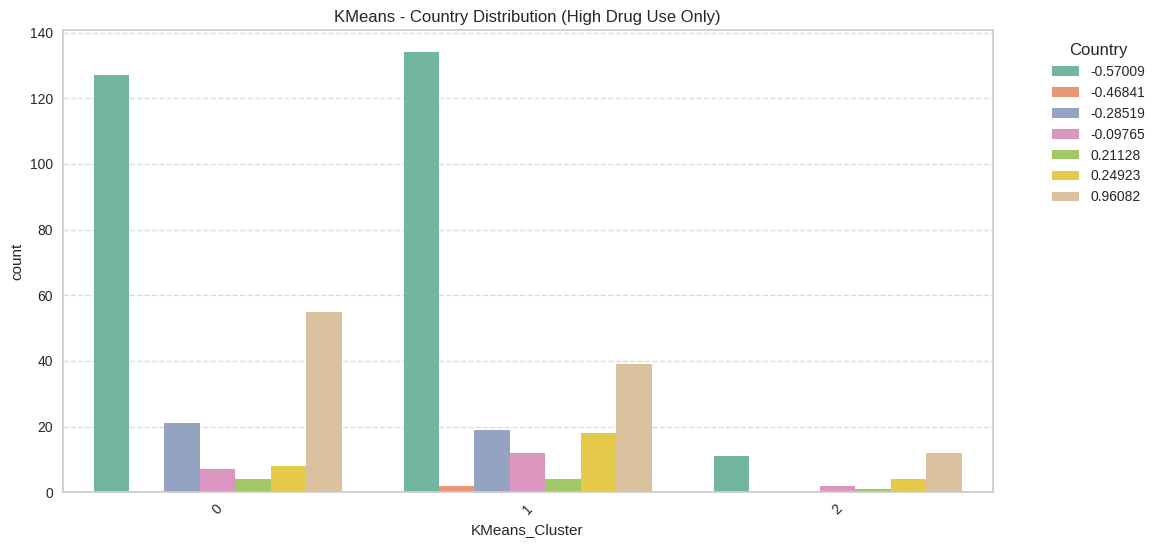

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='KMeans_Cluster', hue='Country', data=df[df['high_drug_use'] == 1], palette="Set2")
plt.title(f"KMeans - Country Distribution (High Drug Use Only)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

High Drug users mostly found from USA.
  
  
  Value/ Country/ Size within the dataset
- -0.09765 	Australia 2.86%
- 0.24923 	Canada 4.62%
- -0.46841 	New Zealand 	0.27%
- -0.28519 	Other 6.26%
- 0.21128 	Republic of Ireland 1.06%
- 0.96082 	UK 	55.38%
- -0.57009 	USA 29.55%


<ipython-input-67-d72d0992a407>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




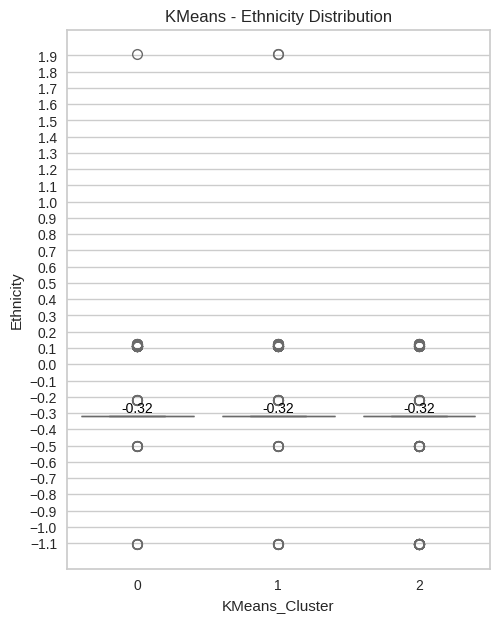

In [ ]:
feature5 = 'Ethnicity'

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature5, data=df, palette="Set3")
plt.title(f"KMeans - {feature5} Distribution")

# Calculate and add median values
medians = df.groupby('KMeans_Cluster')[feature5].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ethnicity_min = df[feature5].min()
ethnicity_max = df[feature5].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ethnicity_min, 1), round(ethnicity_max + 0.1, 1), 0.1))

plt.show()

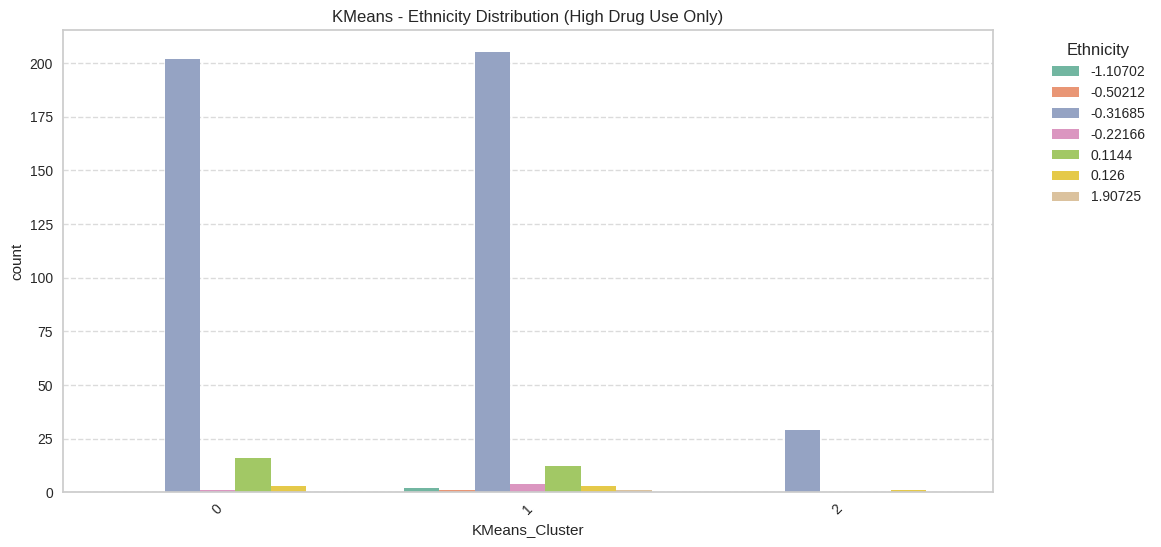

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='KMeans_Cluster', hue='Ethnicity', data=df[df['high_drug_use'] == 1], palette="Set2")
plt.title(f"KMeans - Ethnicity Distribution (High Drug Use Only)")

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Dataset is highly represented by White given the range of -0.31685 or 1720, 	91.25% of the whole dataset



<ipython-input-66-f834d8e8e37a>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




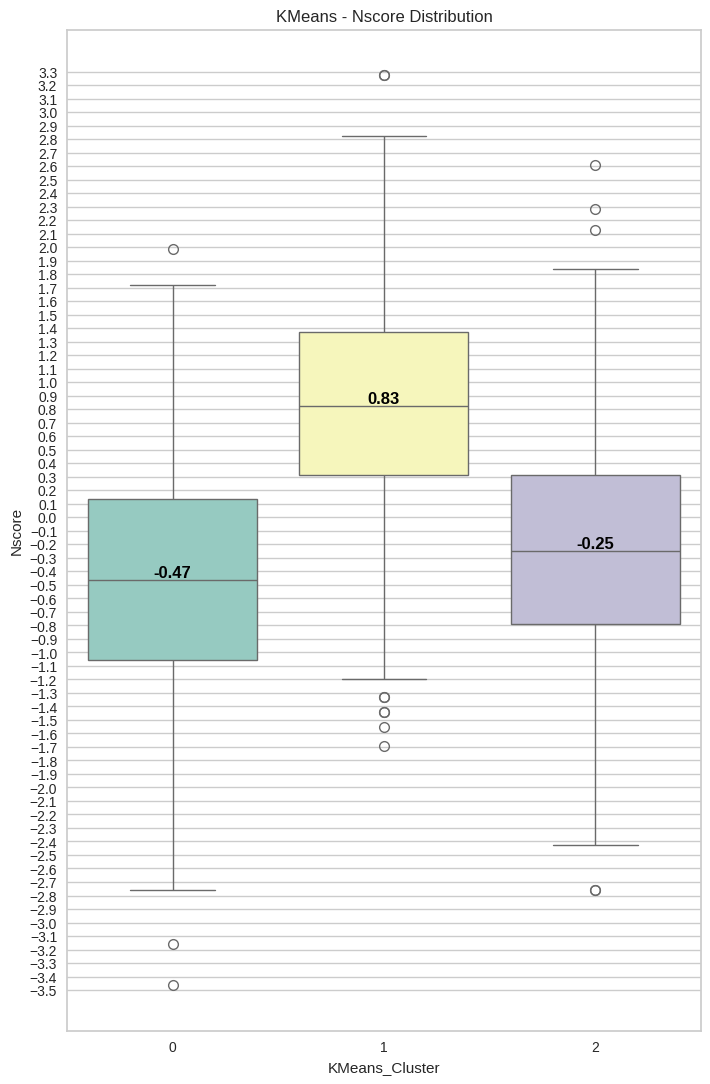

In [ ]:
feature6 = 'Nscore'

plt.figure(figsize=(18, 13))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature6, data=df, palette="Set3")
plt.title(f"KMeans - {feature6} Distribution")

# Calculate and add median values
medians = df.groupby('KMeans_Cluster')[feature6].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Get min and max for Age to dynamically set y-axis ticks
nscore_min = df[feature6].min()
nscore_max = df[feature6].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(nscore_min, 1), round(nscore_max + 0.1, 1), 0.1))

plt.show()

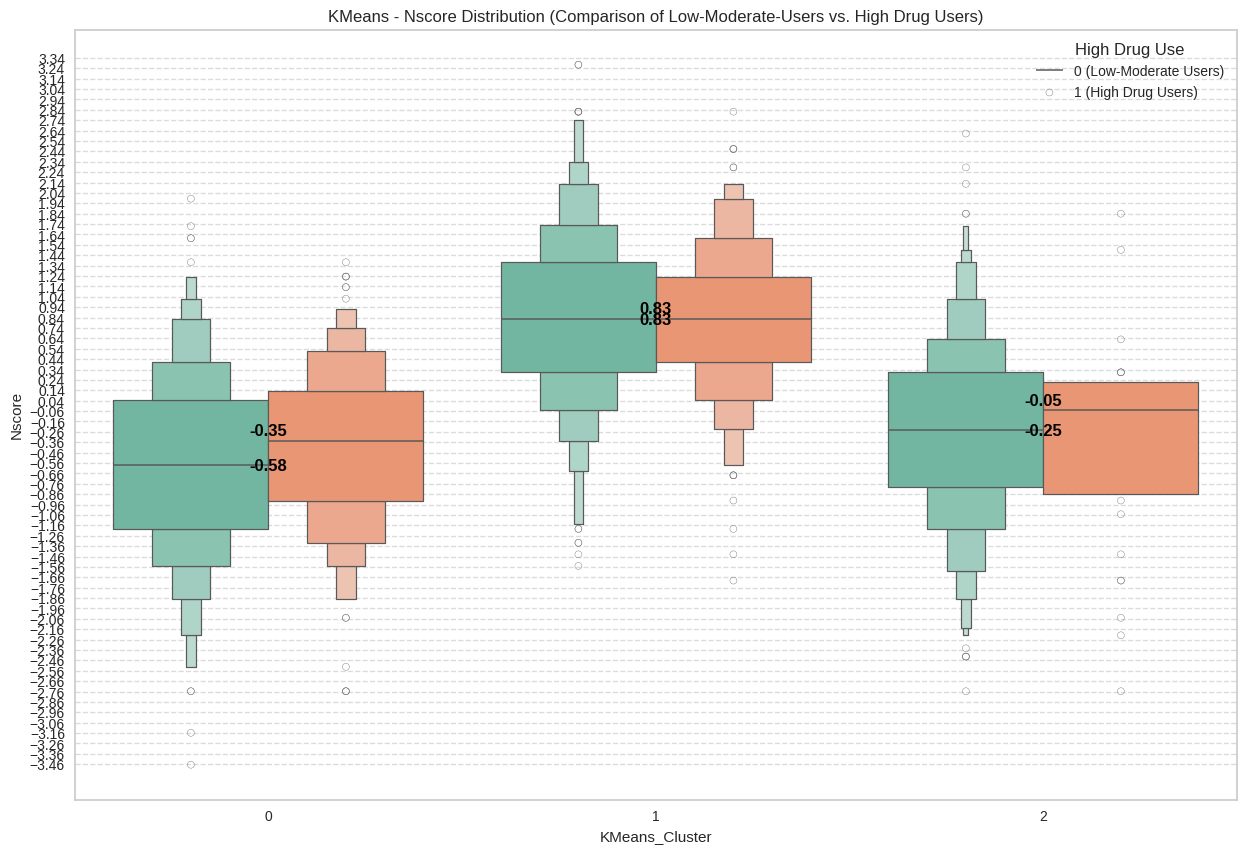

In [ ]:
# Define the feature to visualize
feature6 = 'Nscore'

# Create the boxen plot
plt.figure(figsize=(15, 10))
sns.boxenplot(x='KMeans_Cluster', y=feature6, hue='high_drug_use', data=df, palette="Set2")
plt.title(f"KMeans - {feature6} Distribution (Comparison of Low-Moderate-Users vs. High Drug Users)")

# Calculate and add median values for each cluster and each group (0 and 1)
medians = df.groupby(['KMeans_Cluster', 'high_drug_use'])[feature6].median().reset_index()

for index, row in medians.iterrows():
    cluster_position = row['KMeans_Cluster']  # Cluster position on x-axis
    user_group = row['high_drug_use']  # 0 (Low-Moderate Users) or 1 (High Drug Users)
    median_value = row[feature6]

    # Adjust text position for better visibility
    text_offset = 0.05 if user_group == 1 else -0.05

    plt.text(cluster_position, median_value + text_offset, f'{median_value:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Dynamically set y-axis range based on actual values (to two decimal places)
nscore_min = df[feature6].min()
nscore_max = df[feature6].max()

# Generate y-ticks with a step size of 0.1 for better granularity
plt.yticks(np.arange(round(nscore_min, 2), round(nscore_max + 0.1, 2), 0.1))

# Add a horizontal grid (fine-tuned for readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show legend
plt.legend(title="High Drug Use", labels=["0 (Low-Moderate Users)", "1 (High Drug Users)"])

plt.show()


Cluster 0: High drug users have a higher Nscore (-0.35) vs. -0.58, suggesting slightly more emotional instability.

Cluster 1: Both groups have high Nscore (0.83), indicating greater neuroticism regardless of drug use.

Cluster 2: High drug users have a lower Nscore (-0.25) vs. -0.05, meaning they may be less neurotic than Low-Moderate users.

**Generally:**
- Neuroticism is highest in Cluster 1 for all users. In Clusters 0 & 2, high drug users show slightly more emotional instability than their counterparts.

<ipython-input-65-d95c45aae2bb>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




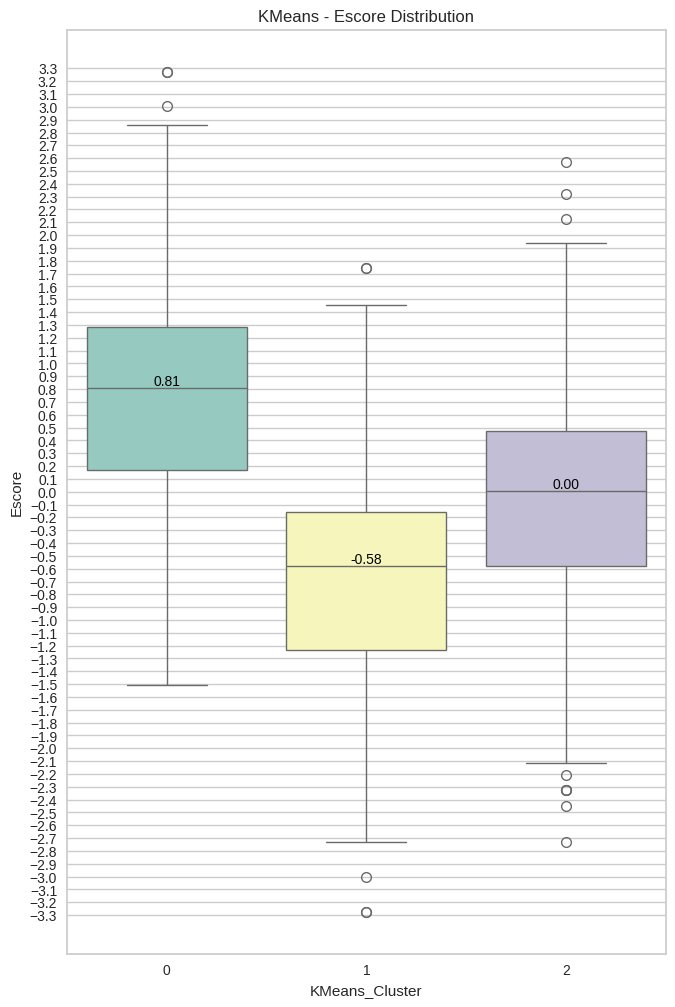

In [ ]:
feature7 = 'Escore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature7, data=df, palette="Set3")
plt.title(f"KMeans - {feature7} Distribution")

# Calculate and add median values
medians = df.groupby('KMeans_Cluster')[feature7].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
escore_min = df[feature7].min()
escore_max = df[feature7].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(escore_min, 1), round(escore_max + 0.1, 1), 0.1))

plt.show()

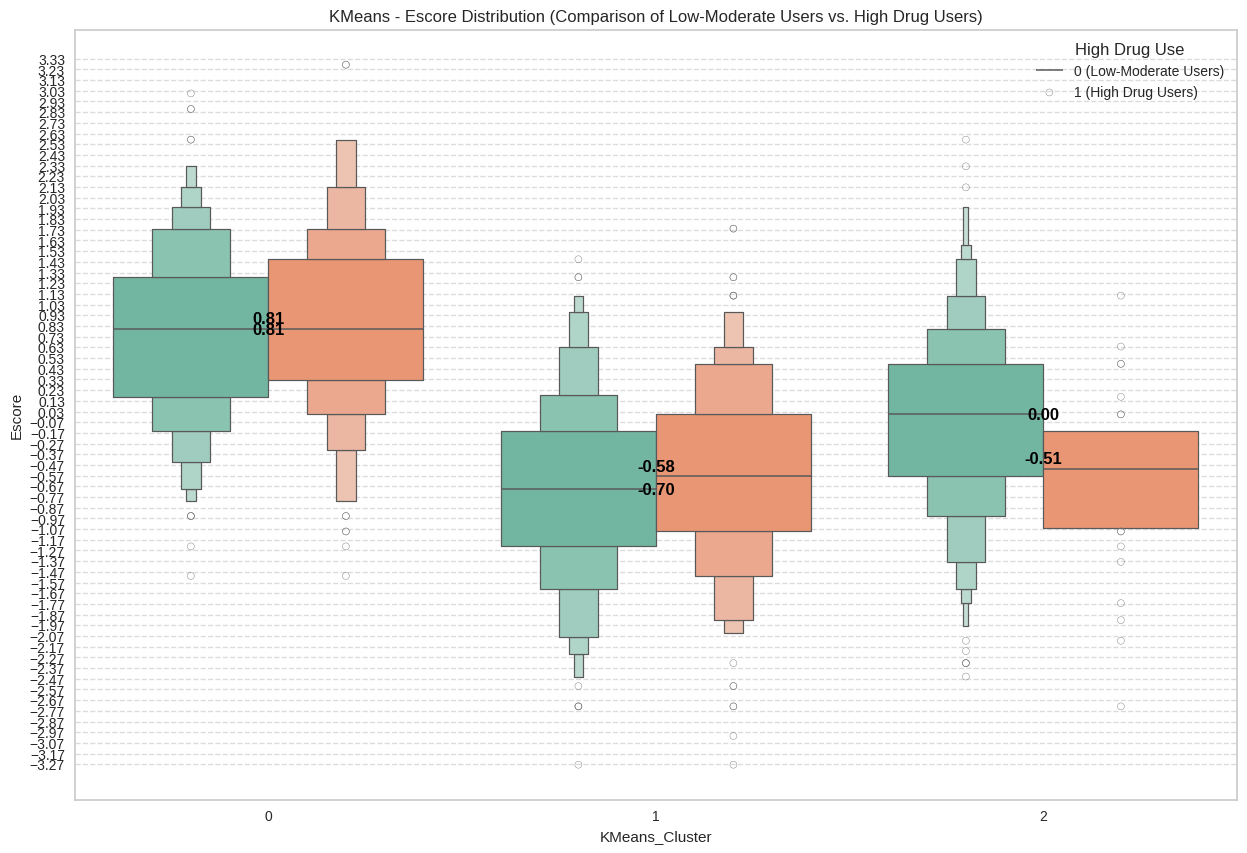

In [ ]:
# Define the feature to visualize
feature7 = 'Escore'

# Create the boxen plot
plt.figure(figsize=(15, 10))
sns.boxenplot(x='KMeans_Cluster', y=feature7, hue='high_drug_use', data=df, palette="Set2")
plt.title(f"KMeans - {feature7} Distribution (Comparison of Low-Moderate Users vs. High Drug Users)")

# Calculate and add median values for each cluster and each group (0 and 1)
medians = df.groupby(['KMeans_Cluster', 'high_drug_use'])[feature7].median().reset_index()

for index, row in medians.iterrows():
    cluster_position = row['KMeans_Cluster']  # Cluster position on x-axis
    user_group = row['high_drug_use']  # 0 (Low-Moderate Users) or 1 (High Drug Users)
    median_value = row[feature7]

    # Adjust text position for better visibility
    text_offset = 0.05 if user_group == 1 else -0.05

    plt.text(cluster_position, median_value + text_offset, f'{median_value:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Dynamically set y-axis range based on actual values (to two decimal places)
escore_min = df[feature7].min()
escore_max = df[feature7].max()

# Generate y-ticks with a step size of 0.1 for better granularity
plt.yticks(np.arange(round(escore_min, 2), round(escore_max + 0.1, 2), 0.1))

# Add a horizontal grid (fine-tuned for readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show legend
plt.legend(title="High Drug Use", labels=["0 (Low-Moderate Users)", "1 (High Drug Users)"])

plt.show()


Cluster 0: High drug users have a higher Escore (0.81) vs. 0.81, indicating they are more extraverted.

Cluster 1: High drug users have a slightly lower Escore (-0.70) vs. -0.58), suggesting they are slightly less extraverted.

Cluster 2: High drug users have a lower Escore (-0.51) vs. 0.00), indicating a noticeable difference in extraversion levels.

Generally:
- High drug users in Cluster 0 tend to be more extraverted, while those in Clusters 1 are less extraverted with Cluster 2 slightly being similar to cluster 1

<ipython-input-64-886c93f01249>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




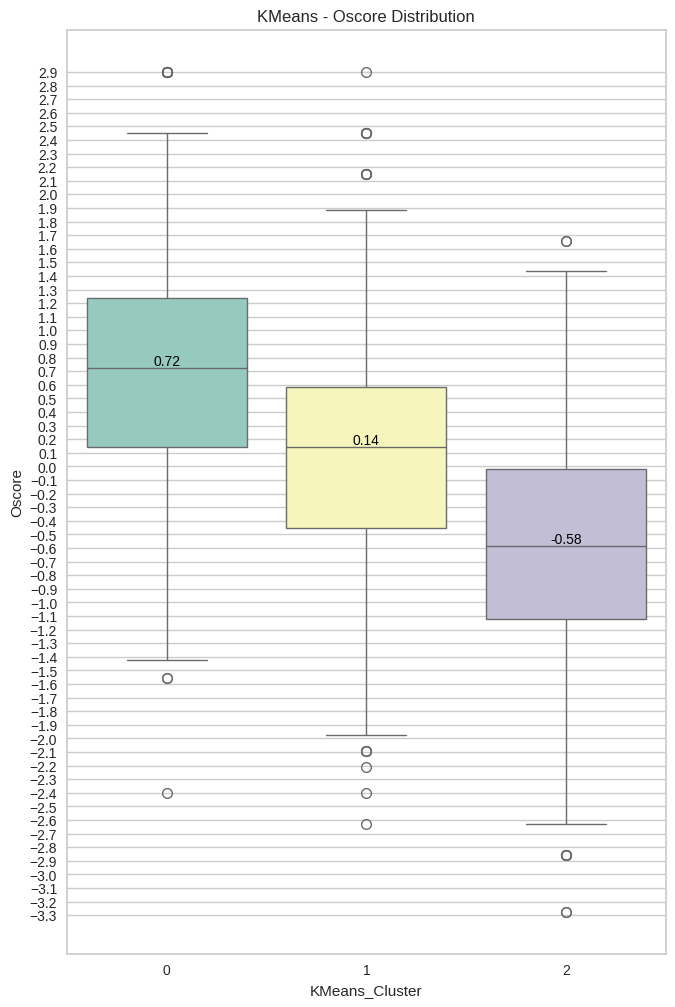

In [ ]:
feature8 = 'Oscore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature8, data=df, palette="Set3")
plt.title(f"KMeans - {feature8} Distribution")

# Calculate and add median values
medians = df.groupby('KMeans_Cluster')[feature8].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
oscore_min = df[feature8].min()
oscore_max = df[feature8].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(oscore_min, 1), round(oscore_max + 0.1, 1), 0.1))

plt.show()

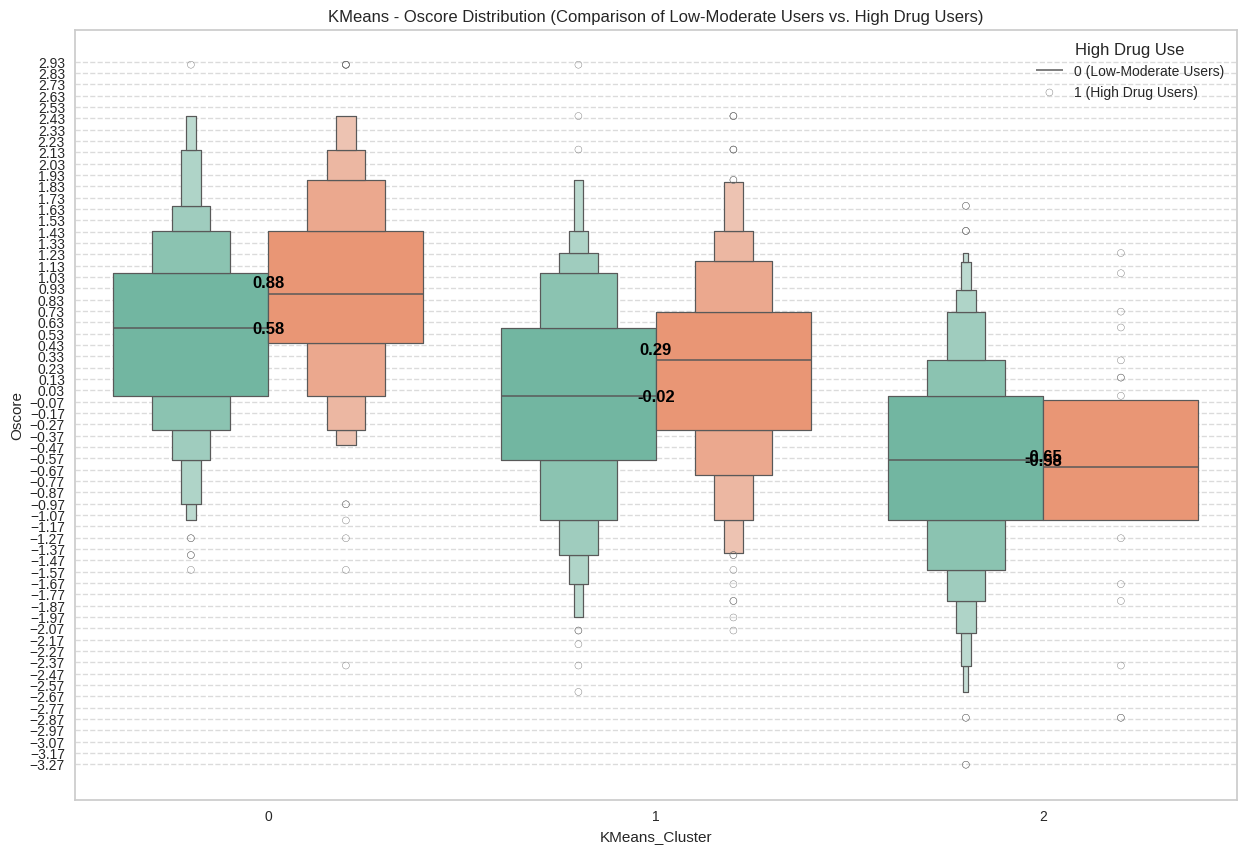

In [ ]:

# Define the feature to visualize
feature8 = 'Oscore'

# Create the boxen plot
plt.figure(figsize=(15, 10))
sns.boxenplot(x='KMeans_Cluster', y=feature8, hue='high_drug_use', data=df, palette="Set2")
plt.title(f"KMeans - {feature8} Distribution (Comparison of Low-Moderate Users vs. High Drug Users)")

# Calculate and add median values for each cluster and each group (0 and 1)
medians = df.groupby(['KMeans_Cluster', 'high_drug_use'])[feature8].median().reset_index()

for index, row in medians.iterrows():
    cluster_position = row['KMeans_Cluster']  # Cluster position on x-axis
    user_group = row['high_drug_use']  # 0 (Low-Moderate Users) or 1 (High Drug Users)
    median_value = row[feature8]

    # Adjust text position for better visibility
    text_offset = 0.05 if user_group == 1 else -0.05

    plt.text(cluster_position, median_value + text_offset, f'{median_value:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Dynamically set y-axis range based on actual values (to two decimal places)
oscore_min = df[feature8].min()
oscore_max = df[feature8].max()

# Generate y-ticks with a step size of 0.1 for better granularity
plt.yticks(np.arange(round(oscore_min, 2), round(oscore_max + 0.1, 2), 0.1))

# Add a horizontal grid (fine-tuned for readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show legend
plt.legend(title="High Drug Use", labels=["0 (Low-Moderate Users)", "1 (High Drug Users)"])

plt.show()


Cluster 0: High drug users in this cluster tend to have a significantly higher Openness score (0.88) compared to Low-Moderate users (0.58). This suggests that individuals in Cluster 0 who engage in high drug use may be more open to new experiences.

Cluster 1: The difference in Oscore between the two groups is present but smaller, with high drug users at 0.29 and Low-Moderate users at -0.02. This suggests a more balanced distribution of openness to experience in Cluster 1.

Cluster 2: This cluster has a negative Oscore (-0.95 for both groups), indicating that individuals in this group tend to have lower openness to experience, especially high drug users.

**Generally:**
- Higher openness is associated with increased drug use, but the effect varies across clusters.
- Cluster 0 shows the strongest link between openness and drug use.
- Low openness does not prevent drug use, as seen in Cluster 2, indicating that other influences may be at play.



<ipython-input-63-4fa1097cea7e>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




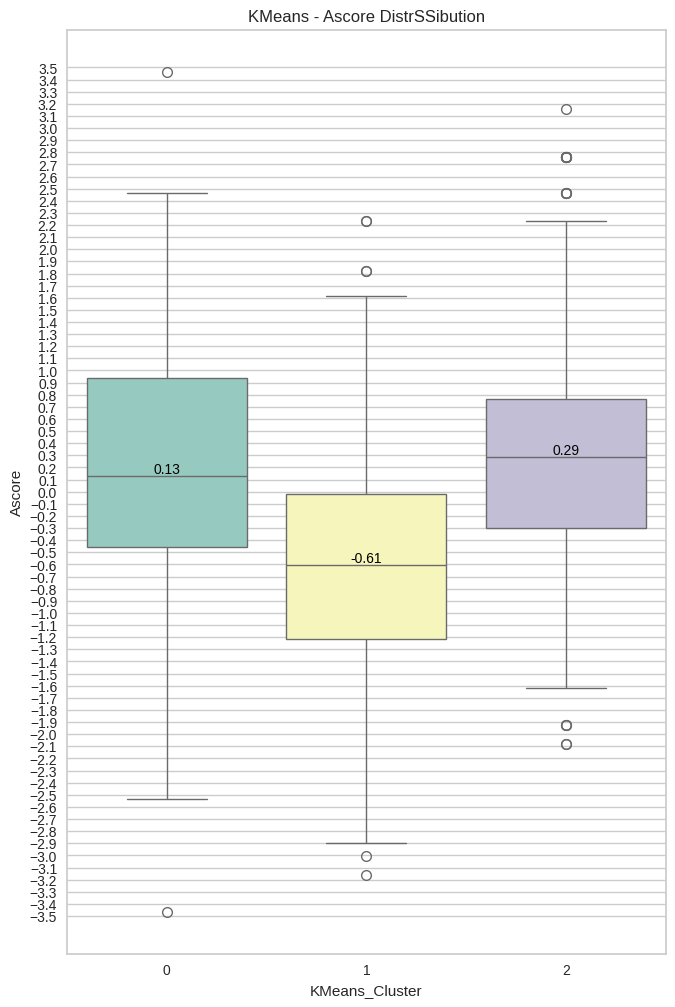

In [ ]:
feature9 = 'Ascore'

plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature9, data=df, palette="Set3")
plt.title(f"KMeans - {feature9} DistrSSibution")

# Calculate and add median values
medians = df.groupby('KMeans_Cluster')[feature9].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ascore_min = df[feature9].min()
ascore_max = df[feature9].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ascore_min, 1), round(ascore_max + 0.1, 1), 0.1))

plt.show()

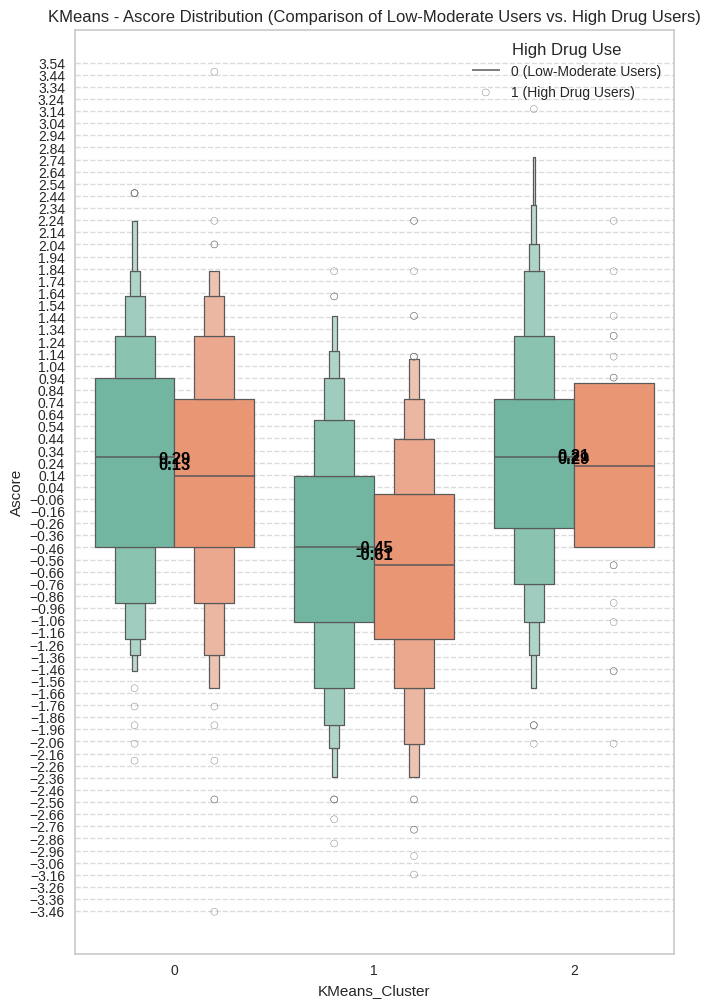

In [ ]:
# Define the feature to visualize
feature9 = 'Ascore'

# Create the boxen plot
plt.figure(figsize=(17, 12))
plt.subplot(1, 2, 2)
sns.boxenplot(x='KMeans_Cluster', y=feature9, hue='high_drug_use', data=df, palette="Set2")
plt.title(f"KMeans - {feature9} Distribution (Comparison of Low-Moderate Users vs. High Drug Users)")

# Calculate and add median values for each cluster and each group (0 and 1)
medians = df.groupby(['KMeans_Cluster', 'high_drug_use'])[feature9].median().reset_index()

for index, row in medians.iterrows():
    cluster_position = row['KMeans_Cluster']  # Cluster position on x-axis
    user_group = row['high_drug_use']  # 0 (Low-Moderate Users) or 1 (High Drug Users)
    median_value = row[feature9]

    # Adjust text position for better visibility
    text_offset = 0.05 if user_group == 1 else -0.05

    plt.text(cluster_position, median_value + text_offset, f'{median_value:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Dynamically set y-axis range based on actual values (to two decimal places)
ascore_min = df[feature9].min()
ascore_max = df[feature9].max()

# Generate y-ticks with a step size of 0.1 for better granularity
plt.yticks(np.arange(round(ascore_min, 2), round(ascore_max + 0.1, 2), 0.1))

# Add a horizontal grid (fine-tuned for readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show legend
plt.legend(title="High Drug Use", labels=["0 (Low-Moderate Users)", "1 (High Drug Users)"])

plt.show()


indicates how agreeable a person is, sually warm, friendly, optimist, and tactful.

Cluster 0: High drug users (0.23) have a lower agreeableness score than Low-Moderate users, indicating they may be slightly less cooperative or empathetic.

Cluster 1: High drug users have a much lower Ascore (-0.85), suggesting they are significantly less agreeable than Low-Moderate users.

Cluster 2: Minimal difference in Ascore (0.24 vs. 0.21), meaning agreeableness does not strongly differentiate high drug users in this group.

**Generally:**
- High drug users generally show lower agreeableness across clusters.
- Cluster 1 has the strongest difference, with high drug users being the least agreeable

<ipython-input-62-b844dca0a208>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




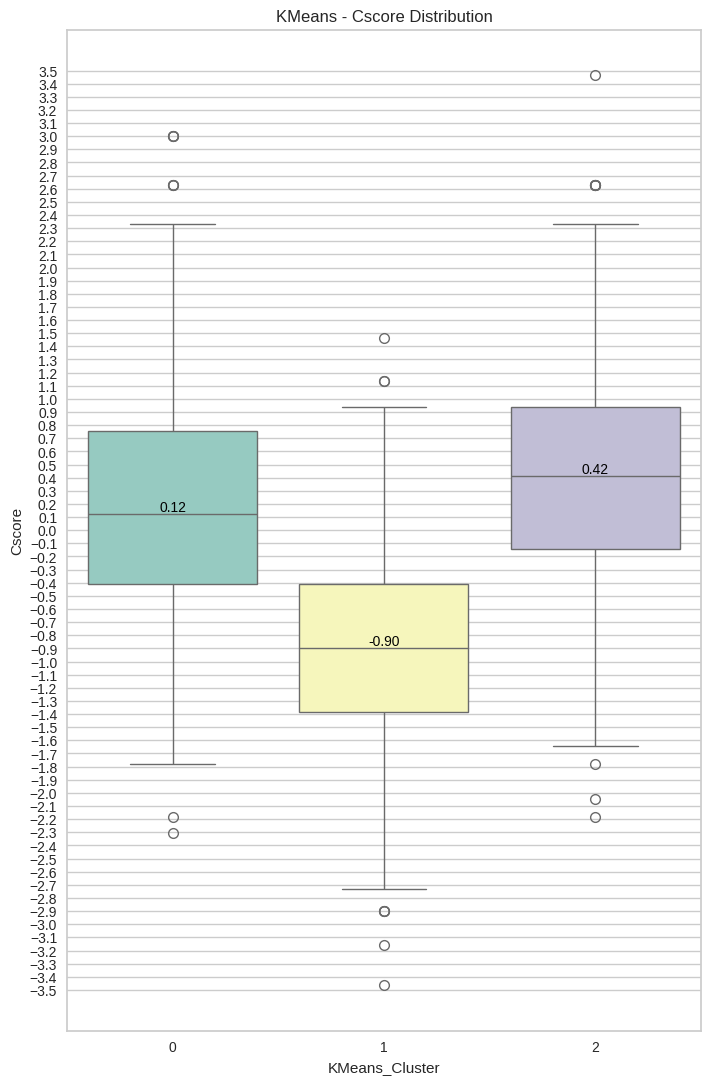

In [ ]:
feature10 = 'Cscore'

plt.figure(figsize=(18, 13))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature10, data=df, palette="Set3")
plt.title(f"KMeans - {feature10} Distribution")

# Calculate and add median values
medians = df.groupby('KMeans_Cluster')[feature10].median().values
# Get positions of the boxes
positions = range(len(medians))

# Annotate with median values
for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
cscore_min = df[feature10].min()
cscore_max = df[feature10].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(cscore_min, 1), round(cscore_max + 0.1, 1), 0.1))

plt.show()

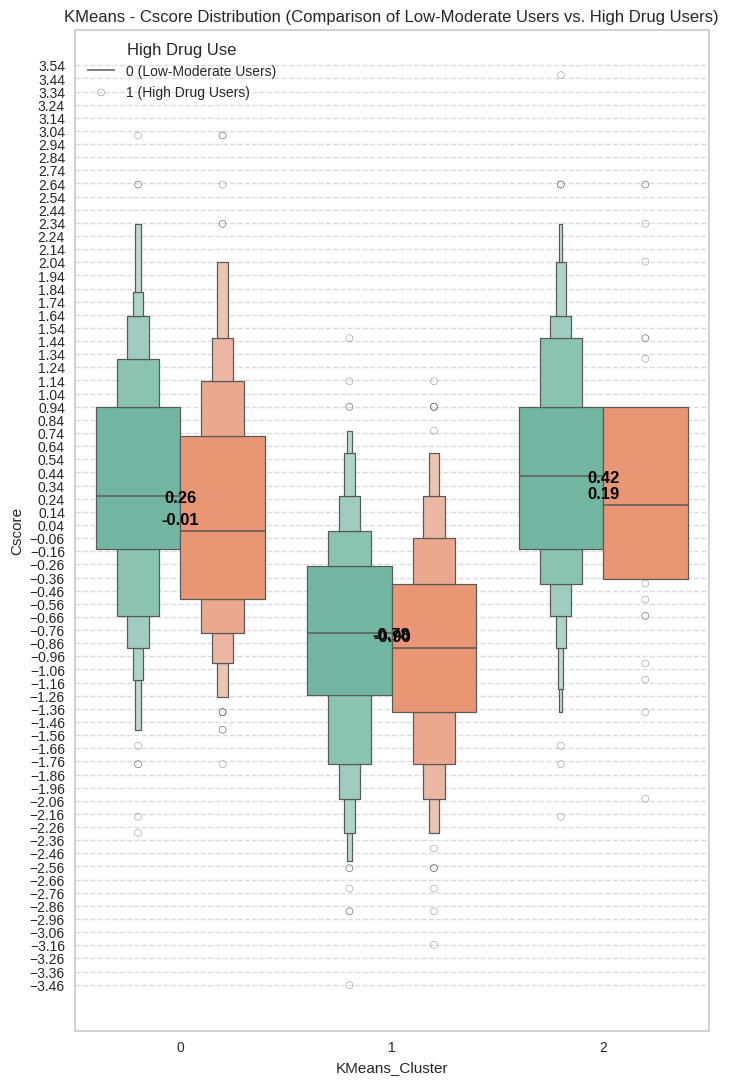

In [ ]:
feature10 = 'Cscore'

# Create the boxen plot
plt.figure(figsize=(18, 13))
plt.subplot(1, 2, 2)
sns.boxenplot(x='KMeans_Cluster', y=feature10, hue='high_drug_use', data=df, palette="Set2")
plt.title(f"KMeans - {feature10} Distribution (Comparison of Low-Moderate Users vs. High Drug Users)")

# Calculate and add median values for each cluster and each group (0 and 1)
medians = df.groupby(['KMeans_Cluster', 'high_drug_use'])[feature10].median().reset_index()

for index, row in medians.iterrows():
    cluster_position = row['KMeans_Cluster']  # Cluster position on x-axis
    user_group = row['high_drug_use']  # 0 (Low-Moderate Users) or 1 (High Drug Users)
    median_value = row[feature10]

    # Adjust text position for better visibility
    text_offset = 0.05 if user_group == 1 else -0.05

    plt.text(cluster_position, median_value + text_offset, f'{median_value:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Dynamically set y-axis range based on actual values (to two decimal places)
cscore_min = df[feature10].min()
cscore_max = df[feature10].max()

# Generate y-ticks with a step size of 0.1 for better granularity
plt.yticks(np.arange(round(cscore_min, 2), round(cscore_max + 0.1, 2), 0.1))

# Add a horizontal grid (fine-tuned for readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show legend
plt.legend(title="High Drug Use", labels=["0 (Low-Moderate Users)", "1 (High Drug Users)"])

plt.show()


A person scoring high in conscientiousness usually has a high level of self-discipline

Cluster 0: High drug users have slightly lower conscientiousness (-0.01 vs. 0.26).

Cluster 1: Biggest gap, with high drug users showing much lower conscientiousness (-0.80), suggesting impulsivity.

Cluster 2: Smallest difference (0.19 vs. 0.42), indicating conscientiousness plays a lesser role here.

**Generally:**
- Lower conscientiousness is linked to higher drug use, especially in Cluster 1, where impulsivity may be a key factor.

<ipython-input-61-63b568efd3ad>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




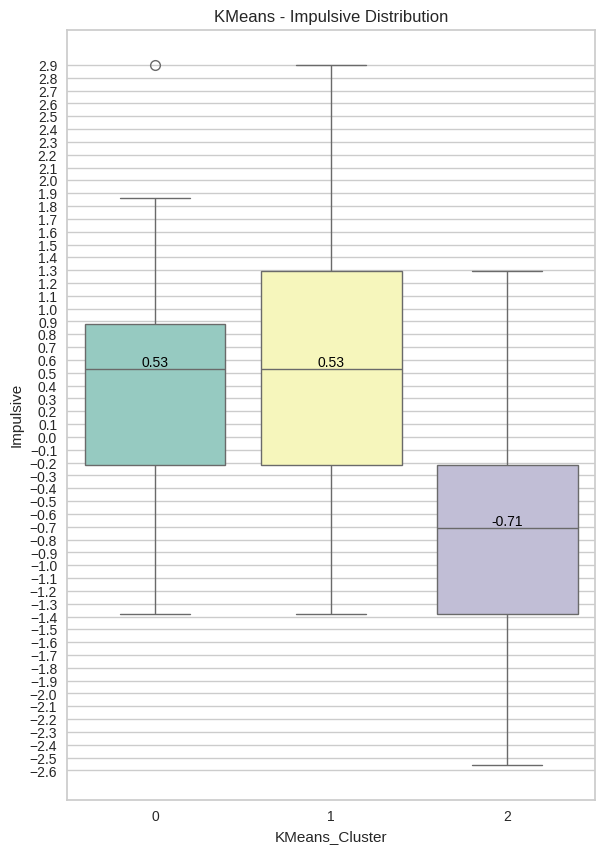

In [ ]:
feature11 = 'Impulsive'

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature11, data=df, palette="Set3")
plt.title(f"KMeans - {feature11} Distribution")

# Calculate and add median values
medians = df.groupby('KMeans_Cluster')[feature11].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
impulsive_min = df[feature11].min()
impulsive_max = df[feature11].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(impulsive_min, 1), round(impulsive_max + 0.1, 1), 0.1))

plt.show()

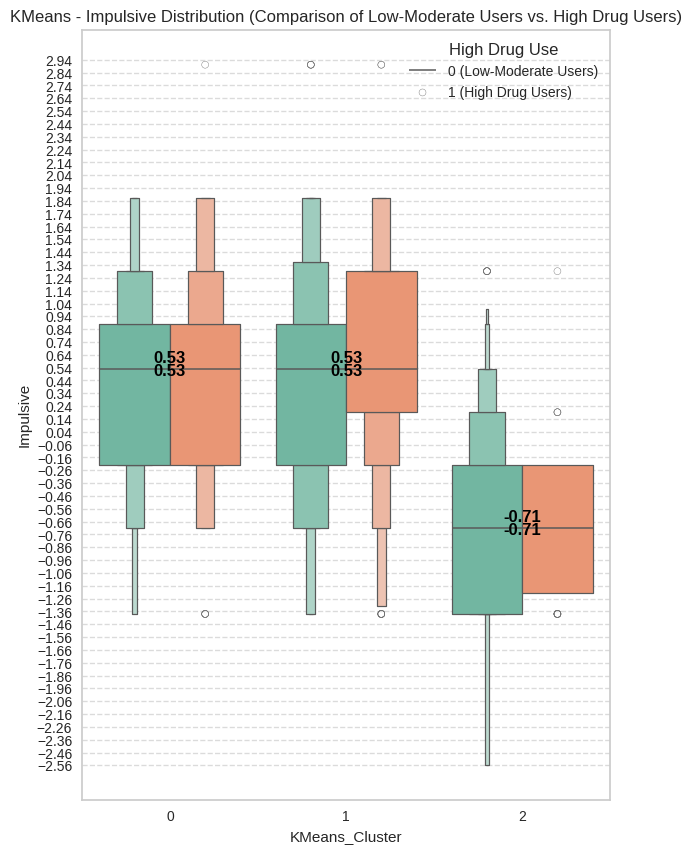

In [ ]:
feature11 = 'Impulsive'

# Create the boxen plot
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxenplot(x='KMeans_Cluster', y=feature11, hue='high_drug_use', data=df, palette="Set2")
plt.title(f"KMeans - {feature11} Distribution (Comparison of Low-Moderate Users vs. High Drug Users)")

# Calculate and add median values for each cluster and each group (0 and 1)
medians = df.groupby(['KMeans_Cluster', 'high_drug_use'])[feature11].median().reset_index()

for index, row in medians.iterrows():
    cluster_position = row['KMeans_Cluster']  # Cluster position on x-axis
    user_group = row['high_drug_use']  # 0 (Low-Moderate Users) or 1 (High Drug Users)
    median_value = row[feature11]

    # Adjust text position for better visibility
    text_offset = 0.05 if user_group == 1 else -0.05

    plt.text(cluster_position, median_value + text_offset, f'{median_value:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Dynamically set y-axis range based on actual values (to two decimal places)
impulsive_min = df[feature11].min()
impulsive_max = df[feature11].max()

# Generate y-ticks with a step size of 0.1 for better granularity
plt.yticks(np.arange(round(impulsive_min, 2), round(impulsive_max + 0.1, 2), 0.1))

# Add a horizontal grid (fine-tuned for readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show legend
plt.legend(title="High Drug Use", labels=["0 (Low-Moderate Users)", "1 (High Drug Users)"])

plt.show()


Cluster 0 & 1: Both have a median 0.53, but Cluster 1 shows the highest impulsivity for high drug users, suggesting a stronger link between impulsivity and drug use in this group.

Cluster 2: Both groups have lower impulsivity (-0.71), indicating that drug use here is likely influenced by other factors.

Generally:
- Impulsivity is highest among high drug users in Cluster 1, suggesting a possible connection between impulsive traits and drug use in this group.

<ipython-input-60-085ead3a0687>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




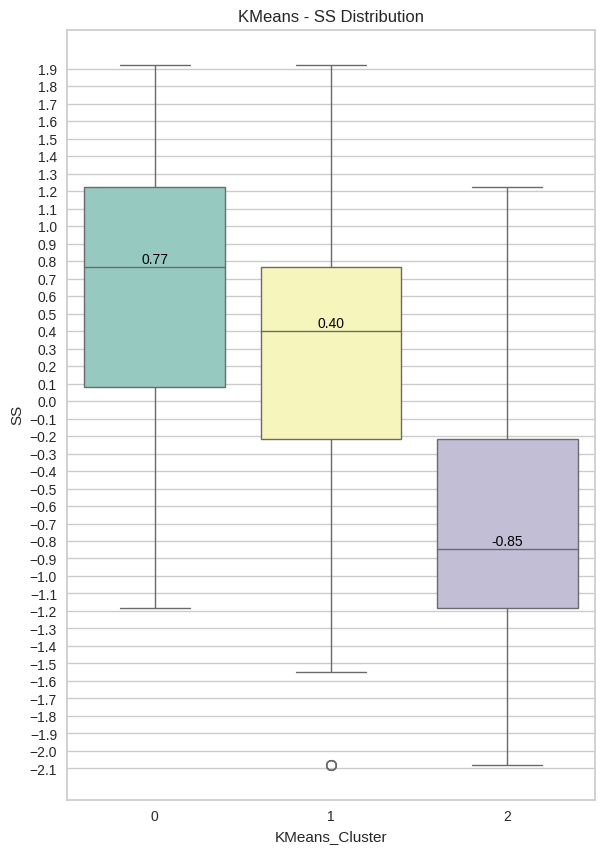

In [ ]:
feature12 = 'SS'

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Cluster', y=feature12, data=df, palette="Set3")
plt.title(f"KMeans - {feature12} Distribution")

# Calculate and add median values
medians = df.groupby('KMeans_Cluster')[feature12].median().values
positions = range(len(medians))

for i, median in enumerate(medians):
    plt.text(positions[i], median + 0.02, f'{median:.2f}',
             horizontalalignment='center', size='small', color='black', weight='regular')

# Get min and max for Age to dynamically set y-axis ticks
ss_min = df[feature12].min()
ss_max = df[feature12].max()

# Generate y-ticks from min to max with desired step size (e.g., 0.1)
plt.yticks(np.arange(round(ss_min, 1), round(ss_max + 0.1, 1), 0.1))

plt.show()

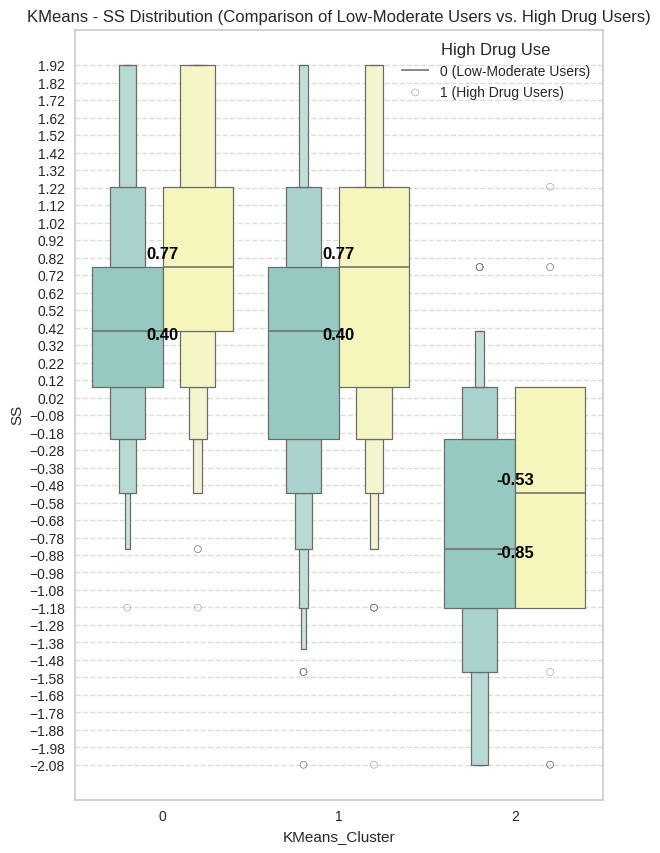

In [ ]:
feature12 = 'SS'

# Create the boxen plot
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 2)
sns.boxenplot(x='KMeans_Cluster', y=feature12, hue='high_drug_use', data=df, palette="Set3")
plt.title(f"KMeans - {feature12} Distribution (Comparison of Low-Moderate Users vs. High Drug Users)")

# Calculate and add median values for each cluster and each group (0 and 1)
medians = df.groupby(['KMeans_Cluster', 'high_drug_use'])[feature12].median().reset_index()

for index, row in medians.iterrows():
    cluster_position = row['KMeans_Cluster']  # Cluster position on x-axis
    user_group = row['high_drug_use']  # 0 (Low-Moderate Users) or 1 (High Drug Users)
    median_value = row[feature12]

    # Adjust text position for better visibility
    text_offset = 0.05 if user_group == 1 else -0.05

    plt.text(cluster_position, median_value + text_offset, f'{median_value:.2f}',
             horizontalalignment='center', size='medium', color='black', weight='semibold')

# Dynamically set y-axis range based on actual values (to two decimal places)
ss_min = df[feature12].min()
ss_max = df[feature12].max()

# Generate y-ticks with a step size of 0.1 for better granularity
plt.yticks(np.arange(round(ss_min, 2), round(ss_max + 0.1, 2), 0.1))

# Add a horizontal grid (fine-tuned for readability)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show legend
plt.legend(title="High Drug Use", labels=["0 (Low-Moderate Users)", "1 (High Drug Users)"])

plt.show()


Cluster 0: High drug users have a higher SS score (0.77) vs. 0.40, indicating a stronger tendency for thrill-seeking.

Cluster 1: Shows the highest variance, meaning sensation-seeking behavior varies widely among individuals, with some being highly thrill-seeking while others are not.

Cluster 2: Both groups show negative SS scores (-0.85, -0.53), suggesting lower sensation-seeking behavior.

Generally:
- High drug users tend to have higher SS - score

In [ ]:
import numpy as np

# Mean personality scores per cluster
personality_means = df.groupby("KMeans_Cluster")[["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive"]].mean()

# Radar plot (spider plot)
import pandas as pd
import plotly.express as px

fig = px.line_polar(personality_means.reset_index().melt(id_vars=["KMeans_Cluster"]),
                    r="value", theta="variable", color="KMeans_Cluster",
                    line_close=True, title="Personality Profile by Cluster",
                    color_discrete_sequence=px.colors.qualitative.Set2) # Setting the color palette

fig.show()

#Conclusion


**What common profile traits exist among people who have high drug use?**

Based on the analyzed data, individuals with high drug usage tend to share common profile traits. They are predominantly younger, aged between 18 and 34, and are mostly male. These individuals generally have lower educational attainment compared to others. In terms of personality traits, they exhibit higher neuroticism (N-score), lower extraversion (E-score), higher openness (O-score), (A-score) lower agreeableness, and (C-score) lower conscientiousness. Additionally, they tend to have higher impulsivity and sensation-seeking tendencies.

concluded profile:
- younger individuals
- mostly male
- lower education level
- higher neuroticism
- lower extraversion
- higher openness
- lower agreaableness
- lower coscientiousness
- higher impulsivity
- higher sensation seeking tendencies
